In [2]:
import numpy as np
import pandas as pd
from foundation import *

In [4]:
df = pd.read_excel('assets\dados_para_sobreposição_com_sobreposição.xlsx')

# Cálculo das coordenadas completas dos vértices das sapatas
df['x1'] = df['xg (m)'] - df['h_x (m)'] / 2
df['y1'] = df['yg (m)'] - df['h_y (m)'] / 2
df['x2'] = df['xg (m)'] + df['h_x (m)'] / 2
df['y2'] = df['yg (m)'] - df['h_y (m)'] / 2
df['x3'] = df['xg (m)'] + df['h_x (m)'] / 2
df['y3'] = df['yg (m)'] + df['h_y (m)'] / 2
df['x4'] = df['xg (m)'] - df['h_x (m)'] / 2
df['y4'] = df['yg (m)'] + df['h_y (m)'] / 2

# Deteriminar sobreposição
for idx, row in df.iterrows():
    aux = 0
    x1_i, y1_i = row['x1'], row['y1']
    x2_i, y2_i = row['x2'], row['y2']
    x3_i, y3_i = row['x3'], row['y3']
    x4_i, y4_i = row['x4'], row['y4']
    for jdx, row_j in df.iterrows():
        if jdx != idx:
            x1_j, y1_j = row_j['x1'], row_j['y1']
            x2_j, y2_j = row_j['x2'], row_j['y2']
            x3_j, y3_j = row_j['x3'], row_j['y3']
            x4_j, y4_j = row_j['x4'], row_j['y4']
            area_overlap = sobreposicao_sapatas(x1_i, y1_i, x2_i, y2_i, x3_i, y3_i, x4_i, y4_i, x1_j, y1_j, x2_j, y2_j, x3_j, y3_j, x4_j, y4_j)
            aux += area_overlap
    df.loc[idx, 'g sobreposicao'] = aux / df.loc[idx, 'h_x (m)'] / df.loc[idx, 'h_y (m)']



df

,Elemento,h_x (m),h_y (m),ap (m),bp (m),spt,solo,xg (m),yg (m),Fz-c1,...,My-c3,x1,y1,x2,y2,x3,y3,x4,y4,g sobreposicao
0,P01,1,1,0.5,0.25,10,argila,1,1,294,...,-0.4,0.5,0.5,1.5,0.5,1.5,1.5,0.5,1.5,0.2500
1,P01,2,2,0.6,0.40,25,argila,0,0,1040,...,190.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,0.0625


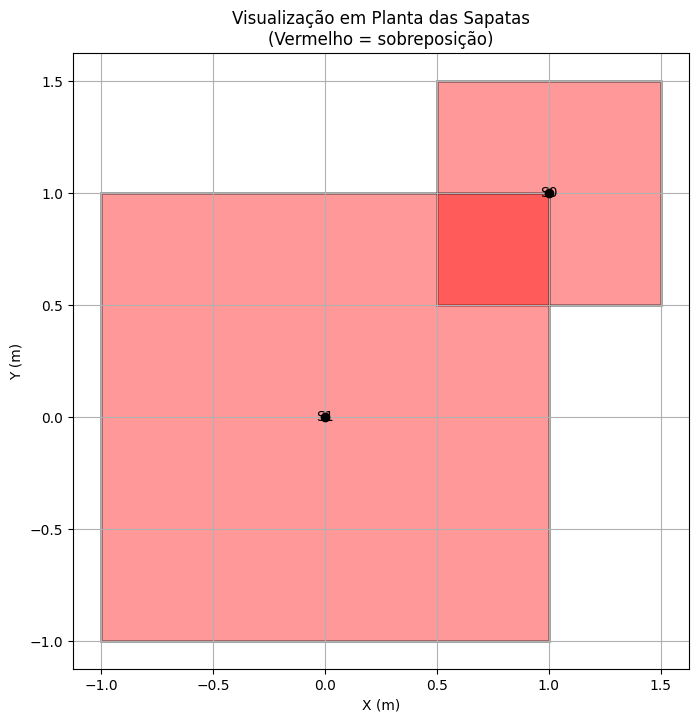

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(8, 8))

for idx, row in df.iterrows():
    # Coordenadas do canto inferior esquerdo
    x_min = row['x1']
    y_min = row['y1']

    largura = row['h_x (m)']
    altura = row['h_y (m)']

    # Cor diferente se houver sobreposição
    if row['g sobreposicao'] > 0:
        edgecolor = 'black'
        facecolor = 'red'
        alpha = 0.4
    else:
        edgecolor = 'blue'
        facecolor = 'blue'
        alpha = 0.3

    # Criar retângulo da sapata
    rect = Rectangle(
        (x_min, y_min),
        largura,
        altura,
        linewidth=2,
        edgecolor=edgecolor,
        facecolor=facecolor,
        alpha=alpha
    )

    ax.add_patch(rect)

    # Marcar centro da sapata
    ax.plot(row['xg (m)'], row['yg (m)'], 'ko')
    ax.text(
        row['xg (m)'],
        row['yg (m)'],
        f"S{idx}",
        fontsize=10,
        ha='center',
        va='center',
        color='black'
    )

# Configurações do gráfico
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Visualização em Planta das Sapatas\n(Vermelho = sobreposição)')

ax.grid(True)

plt.show()
